<a href="https://colab.research.google.com/github/nonoocc/Week15/blob/master/simulation(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Explaining simulation.py
#This file combines the SEIR model with the data of real word, then simulates it, and presents it in the form of dynamic graph
import numpy as np
import csv
import matplotlib.pyplot as plt,time
from matplotlib.animation import FuncAnimation
from matplotlib import rc
rc('animation', html='jshtml')

In [ ]:
#Calculation method of SEIR model
def SEIR(seir, para, steps):
    S,E,I,R = seir
    r,beta,a,gamma,N = para #app_parameters
    dS = -(r*beta*I*S)/N
    dE =  (r*beta*I*S)/N - a*E
    dI = a*E - gamma*I
    dR = gamma*I
    return [S+dS*steps, E+dE*steps, I+dI*steps, R+dR*steps]
#SEIR model is to divide the population in the closed area into four categories: s is the susceptible, e is the latent, I is the infected and R is the rehabilitated.

def calculate(func,seir,para,intervene_N,duration):
    steps = 1
    t = np.arange(0,duration,steps)
    res=[]
    pre0 = para[0]
    for itm in t:
        if intervene_N!=0:
            if itm>intervene_N:
                para[0]=int(pre0*0.5)
                para[1]=4
        seir=func(seir,para,steps)
        res.append(seir)
    return np.array(res)
#Calculate the SEIR value in the time period of duration

#Integrate real world data
def getReal(fname,st,end):
    #fname="real_world/UK_covid.csv"
    total_cases=[]
    with open(fname,"r")as f:
        temp=csv.reader(f)
        for i in temp:
            try:
                total_cases.append(int(i[4]))
            except:
                total_cases.append(0)
        del total_cases[0]
    real_cases = total_cases[st:end]
    return(real_cases)

#Classify and store the values of SEIR
def do_simulation(SEIR,seir,para,intervene_N,STATUSES,duration):

    raw_data = calculate(SEIR,seir,para,intervene_N,duration)
    simulation_result={}

    for idx in range(4):
       simulation_result[STATUSES[idx]] = []
    for i in range(len(raw_data)):
      for idx in range(4):
        simulation_result[STATUSES[idx]].append(raw_data[i,idx])
    return simulation_result
#Status corresponds to the four names, and the fifth is the value of real world



In [ ]:
def animation_line(result_data,STATUSES,COLOURMAP,duration):

    fig, axes = plt.subplots() #Get image

    # Construct line data structure
    ydata = {status: [] for status in STATUSES}
    xdata = []
    line_mpl = {}
    for status, colour in COLOURMAP.items():
        [line] = axes.plot([], [], color=colour, label=status, linewidth=2)
        line_mpl[status] = line
    axes.legend(prop={'size':'x-small'}, loc='center right')
    axes.set_xlabel('days')
    axes.set_ylabel('person', rotation=0)


    def init():
        axes.set_xlim([0,duration])
        axes.set_ylim([0,6000000])
        return []

    def update(framenum):

        xdata.append(len(xdata))
        for status in STATUSES:
            ydata[status].append(result_data[status][framenum])
            line_mpl[status].set_data(xdata, ydata[status])
        return list(line_mpl.values())


    ani = FuncAnimation(fig, update, frames=range(duration),
                    init_func = init, blit=True, interval=10)
    plt.show()
    return ani

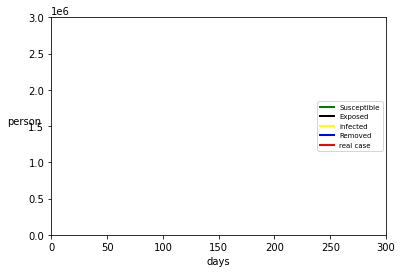

In [ ]:
COLOURMAP = {
    'Susceptible': 'green',
    'Exposed': 'black',
    'infected': 'yellow',
    'Removed': 'blue',
    'real case': 'red'
}
STATUSES=['Susceptible','Exposed','infected','Removed','real case']

intervene_N = 3
#Here, you can change the data range of the original real world value to realize the original real value
st = 100
end = 400
real_data = getReal("UK_covid.csv",st,end)

duration = end-st
## The parameters
steps = 1
seir= [2820771,0,1,0] #S  E  I  R
para = [30,0.1,0.2,0.2, 6820711] #The data in para set are R, beta, a, gamma and the total number of people.
seir[0] = real_data[0]


simulation_data = do_simulation(SEIR,seir,para,intervene_N,STATUSES,duration)
simulation_data['real case']=real_data

anim = animation_line(simulation_data,STATUSES,COLOURMAP,duration)
#This is the result of the final program. The new crown is simulated and predicted

In [ ]:
anim